In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [131]:
dataset= pd.read_csv('train.csv')
dataset.drop(['ADDRESS'],axis=1,inplace=True)
dataset.head()


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,60.5


In [195]:
x= dataset.iloc[:,:-1].values
y= dataset.iloc[:,-1].values
print(x)

[['Owner' 0 0 ... 1 16.81170713468579 75.38575631808583]
 ['Dealer' 0 0 ... 1 16.81170713468579 75.38575631808583]
 ['Owner' 0 0 ... 1 16.81170713468579 75.38575631808583]
 ...
 ['Dealer' 0 0 ... 1 27.898205203324643 76.8866541645348]
 ['Owner' 0 0 ... 1 16.81170713468579 75.38575631808583]
 ['Dealer' 0 1 ... 1 27.898205203324643 76.8866541645348]]


In [133]:
x.shape

(29451, 10)

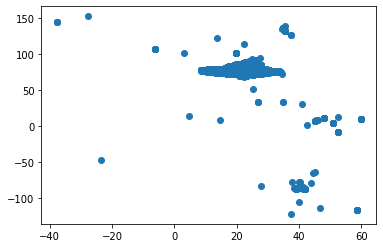

In [134]:
plt.scatter(dataset['LONGITUDE'],dataset['LATITUDE'])

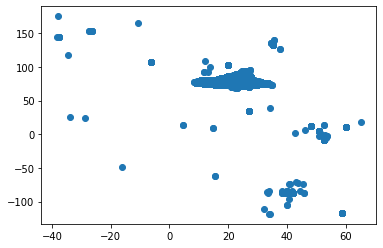

In [161]:
plt.scatter(test_data['LONGITUDE'],test_data['LATITUDE'])

In [135]:
test_data= pd.read_csv('test.csv')
test_data.drop(['ADDRESS'],axis=1,inplace=True)
x_1 =test_data.iloc[:,:].values
print(x_1)

[['Owner' 0 0 ... 1 21.262 73.0477]
 ['Dealer' 1 1 ... 0 18.966114 73.148278]
 ['Dealer' 0 0 ... 1 22.5922 88.484911]
 ...
 ['Dealer' 1 1 ... 0 19.222101 72.988231]
 ['Dealer' 0 0 ... 1 18.49667 73.94167]
 ['Dealer' 0 0 ... 1 19.124896 72.89350300000002]]


In [136]:
x_1.shape

(68720, 10)

In [137]:
x_1

array([['Owner', 0, 0, ..., 1, 21.262, 73.0477],
       ['Dealer', 1, 1, ..., 0, 18.966114, 73.148278],
       ['Dealer', 0, 0, ..., 1, 22.5922, 88.484911],
       ...,
       ['Dealer', 1, 1, ..., 0, 19.222101, 72.988231],
       ['Dealer', 0, 0, ..., 1, 18.49667, 73.94167],
       ['Dealer', 0, 0, ..., 1, 19.124896, 72.89350300000002]],
      dtype=object)

In [138]:
print(x)

[['Owner' 0 0 ... 1 12.96991 77.59796]
 ['Dealer' 0 0 ... 1 12.274538 76.644605]
 ['Owner' 0 0 ... 1 12.778033 77.632191]
 ...
 ['Dealer' 0 0 ... 1 26.928785 75.828002]
 ['Owner' 0 0 ... 1 12.90015 80.22791]
 ['Dealer' 0 1 ... 1 26.832353 75.841749]]


In [139]:
print(y)

[55.  51.  43.  ... 27.1 67.  27.8]


In [143]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,0] =le.fit_transform(x[:,0]) 
x[:,4] =le.fit_transform(x[:,4])
x_1[:,0] =le.fit_transform(x_1[:,0]) 
x_1[:,4] =le.fit_transform(x_1[:,4]) 



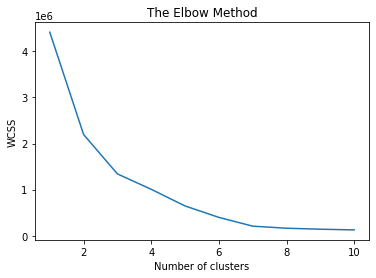

In [144]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset[['LONGITUDE','LATITUDE']])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


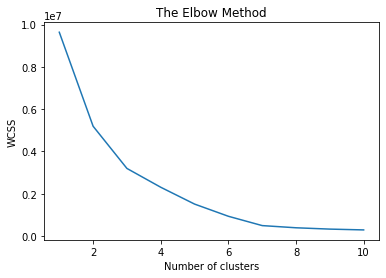

In [149]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(test_data[['LONGITUDE','LATITUDE']])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [173]:
kmeans = KMeans(n_clusters = 4, init ='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(dataset[['LONGITUDE','LATITUDE']])

In [176]:
kmeans_1 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans_1 = kmeans_1.fit_predict(x_1[:,-2:])

In [177]:
print(np.unique(y_kmeans))
print(kmeans.cluster_centers_)
print(y_kmeans)

[0 1 2 3]
[[ 16.81  75.39]
 [ 43.48 -74.61]
 [ 27.9   76.89]
 [ 22.74  88.59]]
[0 0 0 ... 2 0 2]


In [178]:
print(np.unique(y_kmeans_1))
print(kmeans_1.cluster_centers_)
print(y_kmeans_1)

[0 1 2]
[[ 16.84  75.21]
 [ 43.48 -74.61]
 [ 26.61  79.94]]
[0 0 2 ... 0 0 0]


In [179]:
clusterss=pd.DataFrame(data=kmeans.cluster_centers_[y_kmeans],columns=['LONG','LATE'])
clusterss.head(10)

,LONG,LATE
0,16.811707,75.385756
1,16.811707,75.385756
2,16.811707,75.385756
3,27.898205,76.886654
4,27.898205,76.886654
5,16.811707,75.385756
6,27.898205,76.886654
7,27.898205,76.886654
8,16.811707,75.385756
9,16.811707,75.385756


In [180]:
clusterss_1=pd.DataFrame(data=kmeans.cluster_centers_[y_kmeans_1],columns=['LONG_1','LATE_1'])


In [181]:
dataset[['LONGITUDE','LATITUDE']]=clusterss
dataset.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,16.811707,75.385756,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,16.811707,75.385756,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,16.811707,75.385756,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,27.898205,76.886654,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,27.898205,76.886654,60.5


In [182]:
test_data[['LONGITUDE','LATITUDE']]=clusterss_1

In [183]:
print(x)

[[2 0 0 ... 1 12.96991 77.59796]
 [1 0 0 ... 1 12.274538 76.644605]
 [2 0 0 ... 1 12.778033 77.632191]
 ...
 [1 0 0 ... 1 26.928785 75.828002]
 [2 0 0 ... 1 12.90015 80.22791]
 [1 0 1 ... 1 26.832353 75.841749]]


In [184]:
dataset.info

<bound method DataFrame.info of       POSTED_BY  UNDER_CONSTRUCTION  ...   LATITUDE  TARGET(PRICE_IN_LACS)
0         Owner                   0  ...  75.385756                   55.0
1        Dealer                   0  ...  75.385756                   51.0
2         Owner                   0  ...  75.385756                   43.0
3         Owner                   0  ...  76.886654                   62.5
4        Dealer                   1  ...  76.886654                   60.5
...         ...                 ...  ...        ...                    ...
29446     Owner                   0  ...  76.886654                   45.0
29447     Owner                   0  ...  88.590371                   16.0
29448    Dealer                   0  ...  76.886654                   27.1
29449     Owner                   0  ...  75.385756                   67.0
29450    Dealer                   0  ...  76.886654                   27.8

[29451 rows x 11 columns]>

In [185]:
print(x)

[[2 0 0 ... 1 12.96991 77.59796]
 [1 0 0 ... 1 12.274538 76.644605]
 [2 0 0 ... 1 12.778033 77.632191]
 ...
 [1 0 0 ... 1 26.928785 75.828002]
 [2 0 0 ... 1 12.90015 80.22791]
 [1 0 1 ... 1 26.832353 75.841749]]


In [186]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [187]:
x_test.shape

(5891, 10)

In [188]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [189]:
x_train.shape

(23560, 10)

In [190]:
print(y_test)

[100.   36.5  80.  ...  32.   15.   67.5]


In [191]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
l=np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
# for i in l.tolist():
#   print(i)
#   '''print(l.tolist())'''

In [197]:
l[:50,:]

array([[481.8 , 100.  ],
       [ 37.34,  36.5 ],
       [ 43.55,  80.  ],
       [ 60.95,  68.9 ],
       [539.  , 430.  ],
       [ 51.79,  45.  ],
       [ 48.22,  45.9 ],
       [ 48.46,  62.  ],
       [ 71.49,  54.  ],
       [253.  , 250.  ],
       [235.  , 310.  ],
       [ 24.94,  26.  ],
       [ 24.97,  35.  ],
       [ 55.8 ,  55.  ],
       [ 70.89,  52.  ],
       [123.13, 160.  ],
       [114.1 ,  85.  ],
       [ 80.83,  75.  ],
       [ 27.35,  30.  ],
       [ 28.37,  22.6 ],
       [ 69.  ,  85.  ],
       [ 27.64,  31.9 ],
       [ 96.8 , 110.  ],
       [ 42.91,  42.5 ],
       [ 75.5 ,  70.  ],
       [ 90.37,  99.6 ],
       [ 77.8 ,  42.  ],
       [ 20.94,  26.  ],
       [ 42.03,  40.  ],
       [ 58.39,  48.  ],
       [ 45.3 ,  65.  ],
       [ 59.86,  54.6 ],
       [ 60.79,  46.9 ],
       [ 30.04,  30.7 ],
       [ 19.45,  17.  ],
       [ 34.71,  40.  ],
       [ 58.8 ,  35.  ],
       [ 29.6 ,  22.  ],
       [ 51.69,  35.  ],
       [129.6 , 100.  ],


In [192]:
y_pred_1=regressor.predict(x_1)


In [193]:
print(y_pred_1)

[  19.14   71.28   68.8  ... 8031.     86.81  628.  ]


In [194]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9550639723425309

In [70]:
'''np.count_nonzero(np.abs(y_test - y_pred) > 30)'''
np.count_nonzero(np.abs(y_test - y_pred) == 0)

75

In [111]:
a=np.array([2,3,4,6])
print(a)
a[[0,0,0,3,0,0]]

[2 3 4 6]


array([2, 2, 2, 6, 2, 2])